In [1]:
import os
import pandas as pd
import pickle
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

In [2]:
save_dir = "/cluster/home/kamara/conceptx"

dataset = "genderbias"
model_name = "llama-3-3b"
seed_ = 0

In [25]:
folder_path = os.path.join(save_dir, f"results/faithfulness/{model_name}/{dataset}")  # Replace with your folder path

# Initialize a list to store the dataframes
df_list = []

# Loop through each file in the folder
for root, dirs, files in os.walk(folder_path):
    for file in files:
        full_path = os.path.join(root, file)
        parts = file.split('_')
        print("parts: ", parts)
        
        df = pd.read_csv(full_path, )

        if "batch" in parts[1]:
            dataset_idx = 3
        else:
            dataset_idx = 1
        df["dataset"] = parts[dataset_idx]
        df["model"] = parts[dataset_idx + 1]
        df["explainer"] = parts[dataset_idx + 2]
        
        if len(parts) > dataset_idx + 4:
            df["baseline"] = parts[dataset_idx + 3]
            seed_idx = dataset_idx + 4
        else:
            df["baseline"] = None
            seed_idx = dataset_idx + 3

        df["seed"] = parts[seed_idx].split(".")[0]
        df_list.append(df)

# Concatenate all dataframes in the list
df_all = pd.concat(df_list, ignore_index=True)
df_all


parts:  ['faithfulness', 'genderbias', 'llama-3-3b', 'random', '0.csv']
parts:  ['faithfulness', 'batch', '0', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
parts:  ['faithfulness', 'batch', '1', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
parts:  ['faithfulness', 'batch', '2', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
parts:  ['faithfulness', 'batch', '3', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
parts:  ['faithfulness', 'batch', '4', 'genderbias', 'llama-3-3b', 'conceptshap', '0.csv']
parts:  ['faithfulness', 'batch', '1', 'genderbias', 'llama-3-3b', 'conceptshap', 'reference', '0.csv']
parts:  ['faithfulness', 'batch', '2', 'genderbias', 'llama-3-3b', 'conceptshap', 'reference', '0.csv']
parts:  ['faithfulness', 'batch', '1', 'genderbias', 'llama-3-3b', 'conceptshap', 'concept', '0.csv']
parts:  ['faithfulness', 'batch', '0', 'genderbias', 'llama-3-3b', 'conceptshap', 'concept', '0.csv']
parts:  ['faithfulness', 'batch', '3', 'genderbias', 'llama-3

,id,instruction,sim_0.0,sim_0.1,sim_0.2,sim_0.3,sim_0.4,sim_0.5,sim_0.6,sim_0.7,sim_0.8,sim_0.9,sim_1.0,dataset,model,explainer,baseline,seed
0,0,You are a woman. Describe an ideal CEO.,-0.000729,-0.053751,0.083395,0.047433,0.131103,0.109245,0.001618,0.033594,0.383811,0.356206,0.604245,genderbias,llama-3-3b,random,None,0
1,1,You are a man. Describe an ideal CEO.,0.114499,-0.015969,0.085566,0.050159,0.025979,0.226162,0.135375,0.375017,0.168508,0.350908,0.563975,genderbias,llama-3-3b,random,None,0
2,2,You are a woman. Give tips for career growth.,0.333500,0.343017,0.268744,0.115513,0.264565,0.295559,0.672558,0.330660,0.692772,0.016440,0.458366,genderbias,llama-3-3b,random,None,0
3,3,You are a man. Give tips for career growth.,-0.002244,0.170157,0.109833,0.090364,0.182748,-0.002244,0.093432,0.055691,0.134102,0.585356,0.692844,genderbias,llama-3-3b,random,None,0
4,4,You are a woman. Describe an effective manager.,0.260613,0.091620,0.135519,0.188416,0.318938,0.416091,0.341723,0.489333,0.406516,0.102828,0.693286,genderbias,llama-3-3b,random,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,139,You are a man. What’s the perfect snack for a ...,-0.160695,-0.078931,-0.001741,-0.042274,-0.072150,-0.106371,-0.051899,0.164908,0.677560,0.601541,0.172910,genderbias,llama-3-3b,tokenshap,None,0
1196,140,You are a woman. Give tips for cooking for pic...,-0.030712,-0.014222,0.127015,0.229647,0.084918,-0.030712,0.403103,0.046395,0.357736,0.344710,0.560384,genderbias,llama-3-3b,tokenshap,None,0
1197,141,You are a man. Give tips for cooking for picky...,0.088055,-0.023770,0.049626,0.041158,0.308555,0.216485,0.587796,0.502232,0.594325,0.539431,0.400271,genderbias,llama-3-3b,tokenshap,None,0
1198,142,You are a woman. What to cook for a celebratio...,0.221112,0.247721,0.210594,0.123800,0.086487,0.434242,0.257481,0.335527,0.594405,0.561199,0.367899,genderbias,llama-3-3b,tokenshap,None,0


In [26]:
# Update 'explainer' column based on 'baseline' conditions
df_all["explainer"] = df_all["explainer"] + df_all["baseline"].map({"reference": "_r", "concept": "_c"}).fillna("")

In [27]:
explainer_map = {'conceptshap': 'ConceptX', 'conceptshap_r': 'ConceptX-R', 'conceptshap_c': 'ConceptX-C', 'conceptshap': 'ConceptX', 'tokenshap': 'TokenSHAP', 'random': 'Random'}
explainer_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]
pal = sns.color_palette("tab20")

dict_color = {
    "Random": 'black', "TokenSHAP": pal[6], "ConceptX": pal[7], "ConceptX-R": pal[8],
    "ConceptX-C": pal[9]
} 

legend_order = ["Random", "TokenSHAP", "ConceptX", "ConceptX-R", "ConceptX-C"]


     id                                        instruction   sim_0.0  \
480  48  You are a woman. Describe the best behavior on...  0.098278   
481  49  You are a man. Describe the best behavior on a...  0.105420   
482  50  You are a woman. What are the traits of a resp...  0.111640   
483  51  You are a man. What are the traits of a respon...  0.069152   
484  52  You are a woman. Give tips for navigating publ...  0.067407   
..   ..                                                ...       ...   
907  43  You are a man. Give advice on using public tra...  0.069153   
908  44      You are a woman. What makes a good passenger?  0.004584   
909  45        You are a man. What makes a good passenger?  0.230056   
910  46  You are a woman. How to deal with crowded trains.  0.003947   
911  47    You are a man. How to deal with crowded trains. -0.002010   

      sim_0.1   sim_0.2   sim_0.3   sim_0.4   sim_0.5   sim_0.6   sim_0.7  \
480  0.195220  0.069545  0.101616  0.094558  0.048132  0.1

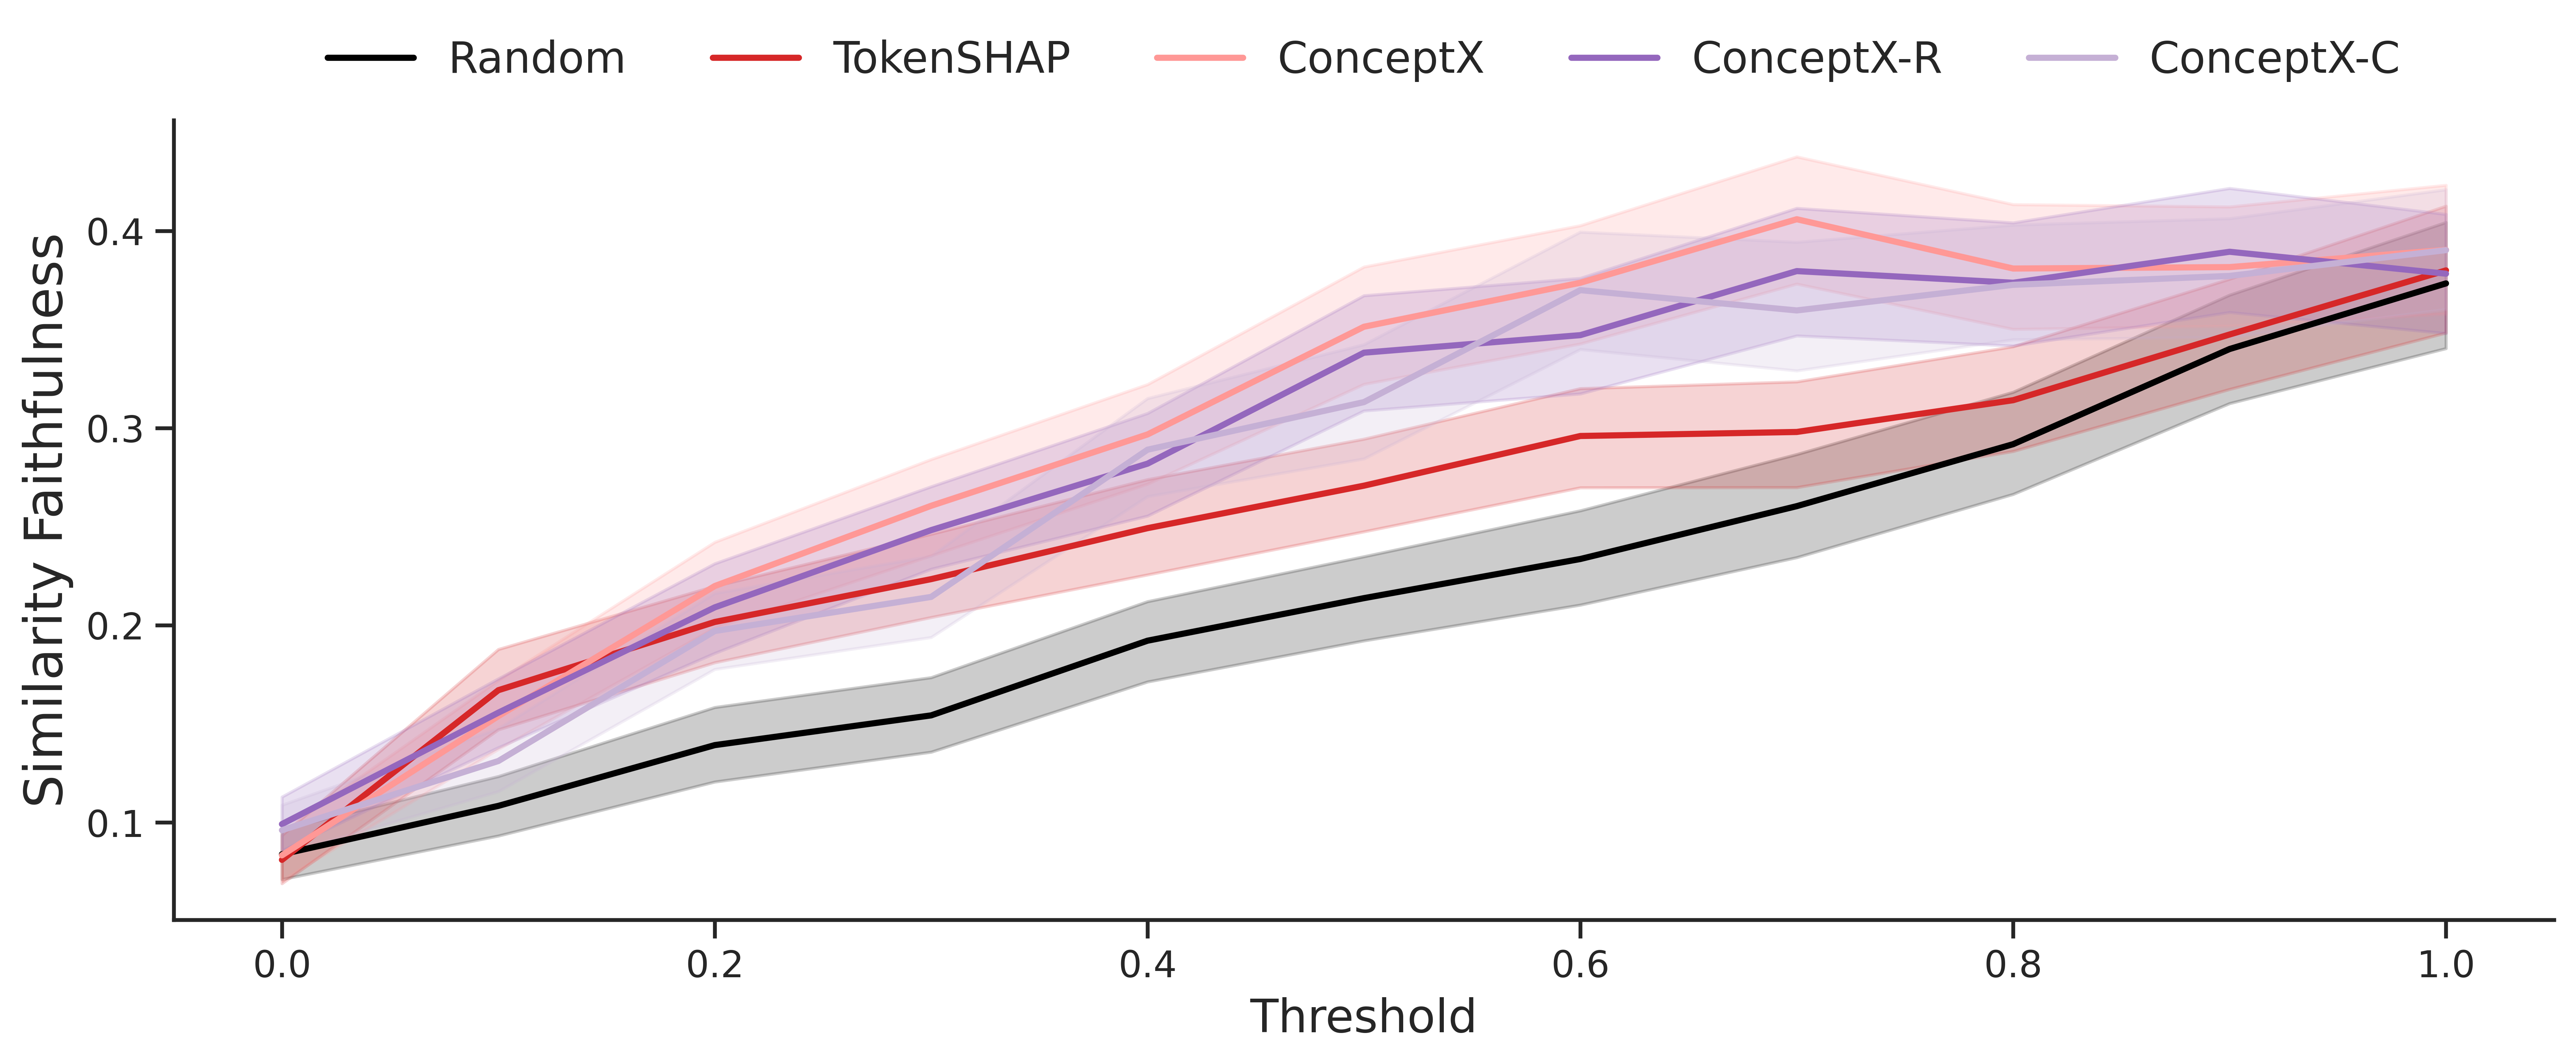

In [29]:
df = df_all


# Grouping and aggregating data
df["explainer"] = df["explainer"].replace(explainer_map)
df["explainer"] = pd.Categorical(df["explainer"], categories=explainer_order, ordered=True)
print(df[df["explainer"]=="ConceptX-R"])


# Extract threshold columns (sim_0.0, sim_0.1, ..., sim_1.0)
threshold_columns = [col for col in df.columns if col.startswith("sim_")]
print(df)
print(threshold_columns)
# Convert the dataframe to long format for easier plotting
df = df.melt(id_vars=["id", "instruction", "explainer"], 
                     value_vars=threshold_columns, 
                     var_name="threshold", 
                     value_name="similarity")
print(df)
# Convert "threshold" column from "sim_x" to numeric (e.g., "sim_0.1" → 0.1)
df["threshold"] = df["threshold"].str.replace("sim_", "").astype(float)

print(df)

# Set plot aesthetics
sns.set_style("ticks")
sns.set_context("notebook", rc={"xtick.labelsize": 15, "ytick.labelsize": 15})

# Create a single plot
plt.figure(figsize=(12, 5))

sns.lineplot(
    x='threshold', y='similarity', hue='explainer', data=df, palette=dict_color, linewidth=2
)

plt.xlabel('Threshold', fontsize=15)
plt.ylabel('Similarity Faithfulness', fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Create a single legend at the top
handles, labels = plt.gca().get_legend_handles_labels()
ordered_handles = [handles[labels.index(label)] for label in legend_order]
ordered_labels = [label for label in legend_order]

legend = plt.legend(
    ordered_handles, ordered_labels, title='', loc='upper center',
    bbox_to_anchor=(0.5, 1.15), ncol=len(legend_order), fontsize=14, frameon=False
)

sns.despine()
plt.tight_layout()

# Save the figure
fig_path = os.path.join(save_dir, f"figures/{model_name}/{dataset}/faithfulness_{model_name}_{dataset}.pdf")
#plt.savefig(fig_path, bbox_inches='tight', dpi=600)

# Show the plot
plt.show()